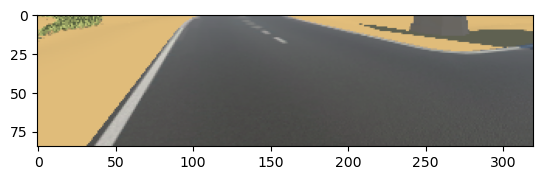

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/home/duc-pc/BKIT/2024-10-01 15-14-00/0145.png")
img = img[-85:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

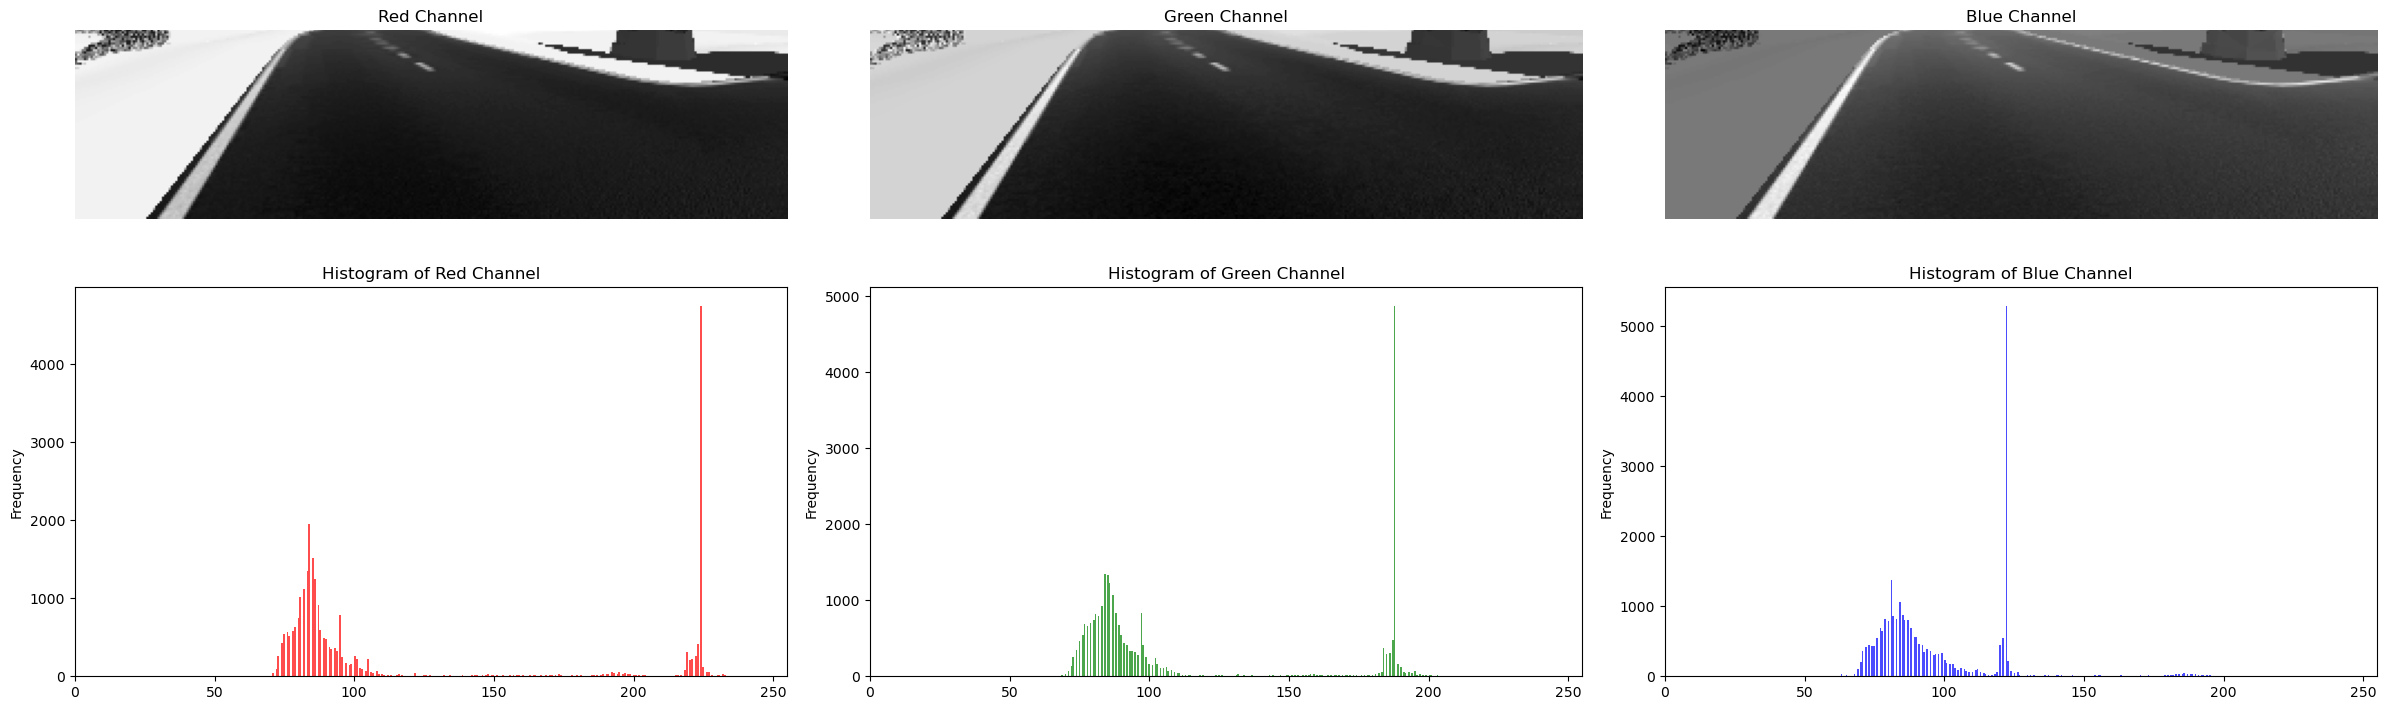

In [38]:
# Create a figure with 3 subplots for images and 3 for histograms
fig, axes = plt.subplots(2, 3, figsize=(24, 8))

# Channel names for labeling
channels = ['Red Channel', 'Green Channel', 'Blue Channel']

# Loop through the channels to display images and histograms
for i in range(3):
    # Display the channel image
    axes[0, i].imshow(img[:, :, i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(channels[i])
    
    # Display the histogram for the channel
    axes[1, i].hist(img[:, :, i].ravel(), bins=256, color=channels[i].lower().split()[0], alpha=0.7)
    axes[1, i].set_xlim([0, 255])  # Adjusted for typical 8-bit image range
    axes[1, i].set_title(f'Histogram of {channels[i]}')
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout
plt.show()

blue = img[:, :, 2]


The value corresponding to 95% cumulative distribution is: 122


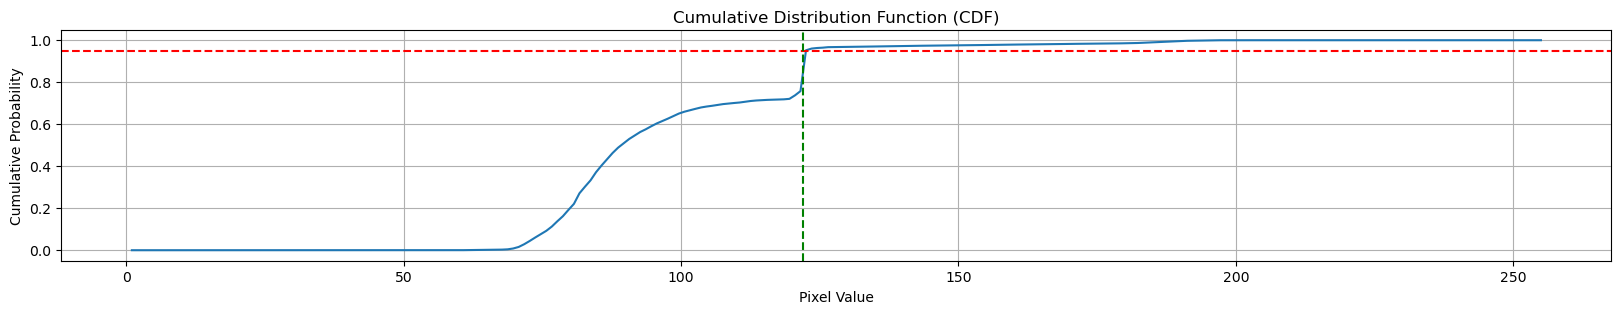

In [39]:
# Flatten the image and compute the histogram
hist, bin_edges = np.histogram(blue.flatten(), bins=256, range=(0, 255))

# Compute the cumulative distribution function (CDF)
cdf = np.cumsum(hist)
cdf_normalized = cdf / cdf[-1]  # Normalize to [0, 1]

# Find the value corresponding to the 90% threshold
threshold_value = np.searchsorted(cdf_normalized, 0.95)

# Print the results
print(f'The value corresponding to 95% cumulative distribution is: {threshold_value}')

# Plotting the CDF
plt.figure(figsize=(20, 3))
plt.plot(bin_edges[1:], cdf_normalized)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=threshold_value, color='g', linestyle='--')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.show()

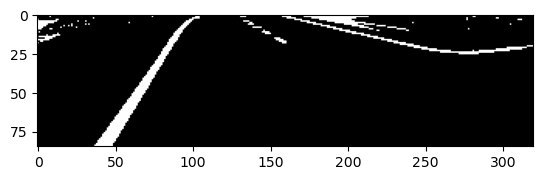

In [40]:
# Set threshold value
threshold = threshold_value  # Adjust as needed

# Create a binary image based on the threshold
binary_blue = np.where(blue > threshold, 255, 0).astype(np.uint8)
plt.imshow(binary_blue, cmap='gray')

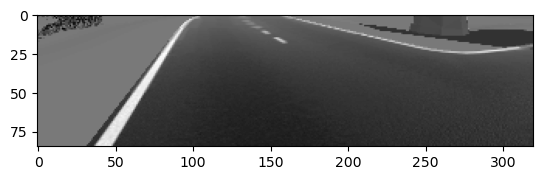

In [41]:
plt.imshow(blue, cmap='gray')